Name - Jainam Rajput
SAP ID - 60009200022
Batch/Div-K/K1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

**Question 1**

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
feature_cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
X= df[feature_cols]
y = df.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT = DT.fit(x_train,y_train)
yhat = DT.predict(x_test) 

Now the model is trained for the Diabetes Dataset and we should check for the accuracy of the model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
print("Accuracy",accuracy_score(y_test,yhat))

Accuracy 1.0


In [ ]:
cm = confusion_matrix(y_test,yhat)

In [ ]:
print(cm)

[[99  0]
 [ 0 55]]


In [ ]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(154, 9)
(154,)
(614, 9)
(614,)


In [ ]:
from sklearn import tree

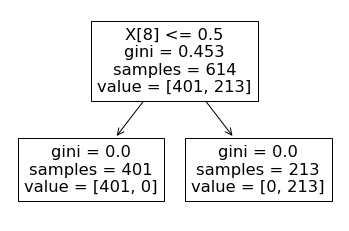

In [ ]:
tree.plot_tree(DT);

Decision Tree made by the model is plotted and visualized with the help of plot_tree function

**QUESTION 2**

In [ ]:
data = pd.read_csv('carprediction.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


First we do some data preprocessing to get better analysis on dataset

In [ ]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
data['Engine HP'].fillna(data['Engine HP'].median(),inplace=True)

In [ ]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
data['Engine Cylinders'].fillna(data['Engine Cylinders'].median(),inplace=True)

In [ ]:
data.fillna(data['Market Category'].value_counts().index[0],inplace=True)

In [ ]:
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
data.duplicated().sum()

715

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(11199, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  object 
 4   Engine HP          11199 non-null  float64
 5   Engine Cylinders   11199 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11199 non-null  object 
 9   Market Category    11199 non-null  object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(2), int64(5

After data is cleaned we need to apply Label Encoding on Categorical values so that it can fit the model

In [ ]:
from sklearn import preprocessing
label_encode = preprocessing.LabelEncoder()
data["Make"] = label_encode.fit_transform(data["Make"])
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,4,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,4,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,4,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,4,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,0,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,0,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,0,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
data["Model"] = label_encode.fit_transform(data["Model"])
data["Engine Fuel Type"] = label_encode.fit_transform(data["Engine Fuel Type"])
data["Transmission Type"] = label_encode.fit_transform(data["Transmission Type"])
data["Driven_Wheels"] = label_encode.fit_transform(data["Driven_Wheels"])
data["Market Category"] = label_encode.fit_transform(data["Market Category"])
data["Vehicle Style"] = label_encode.fit_transform(data["Vehicle Style"])
data["Vehicle Size"] = label_encode.fit_transform(data["Vehicle Size"])
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,9,335.0,6.0,3,3,2.0,38,0,8,26,19,3916,46135
1,4,0,2011,9,300.0,6.0,3,3,2.0,67,0,6,28,19,3916,40650
2,4,0,2011,9,300.0,6.0,3,3,2.0,64,0,8,28,20,3916,36350
3,4,0,2011,9,230.0,6.0,3,3,2.0,67,0,8,28,18,3916,29450
4,4,0,2011,9,230.0,6.0,3,3,2.0,63,0,6,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,901,2012,9,300.0,6.0,1,0,4.0,13,2,2,23,16,204,46120
11910,0,901,2012,9,300.0,6.0,1,0,4.0,13,2,2,23,16,204,56670
11911,0,901,2012,9,300.0,6.0,1,0,4.0,13,2,2,23,16,204,50620
11912,0,901,2013,8,300.0,6.0,1,0,4.0,13,2,2,23,16,204,50920


In [ ]:
data.drop(['Market Category','Number of Doors'],axis=1,inplace=True)
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,9,335.0,6.0,3,3,0,8,26,19,3916,46135
1,4,0,2011,9,300.0,6.0,3,3,0,6,28,19,3916,40650
2,4,0,2011,9,300.0,6.0,3,3,0,8,28,20,3916,36350
3,4,0,2011,9,230.0,6.0,3,3,0,8,28,18,3916,29450
4,4,0,2011,9,230.0,6.0,3,3,0,6,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,901,2012,9,300.0,6.0,1,0,2,2,23,16,204,46120
11910,0,901,2012,9,300.0,6.0,1,0,2,2,23,16,204,56670
11911,0,901,2012,9,300.0,6.0,1,0,2,2,23,16,204,50620
11912,0,901,2013,8,300.0,6.0,1,0,2,2,23,16,204,50920


In [ ]:
data.to_csv('prediction.csv')

In [ ]:
x1 = data.iloc[:,:-1].values
y1 = data.iloc[:,-1].values

In [ ]:
print(x1.shape)
print(y1.shape)

(11199, 13)
(11199,)


In [ ]:
x1

array([[4.000e+00, 1.000e+00, 2.011e+03, ..., 2.600e+01, 1.900e+01,
        3.916e+03],
       [4.000e+00, 0.000e+00, 2.011e+03, ..., 2.800e+01, 1.900e+01,
        3.916e+03],
       [4.000e+00, 0.000e+00, 2.011e+03, ..., 2.800e+01, 2.000e+01,
        3.916e+03],
       ...,
       [0.000e+00, 9.010e+02, 2.012e+03, ..., 2.300e+01, 1.600e+01,
        2.040e+02],
       [0.000e+00, 9.010e+02, 2.013e+03, ..., 2.300e+01, 1.600e+01,
        2.040e+02],
       [2.500e+01, 9.020e+02, 2.006e+03, ..., 2.600e+01, 1.700e+01,
        6.100e+01]])

In [ ]:
y1

array([46135, 40650, 36350, ..., 50620, 50920, 28995], dtype=int64)

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.30,random_state=1)

In [ ]:
print(x_train1)
print(x_test1)
print(y_train1)
print(y_test1)

[[  24.  443. 2015. ...   27.   20.  454.]
 [  33.  686. 2017. ...   32.   25. 2009.]
 [  19.  852. 2010. ...   23.   17. 1439.]
 ...
 [  37.   74. 2016. ...   26.   19. 1715.]
 [  46.  420. 2017. ...   35.   25.  873.]
 [  33.   18. 1996. ...   22.   16. 2009.]]
[[  47.  702. 2017. ...   30.   22.  870.]
 [  29.   11. 2016. ...   41.   30.  586.]
 [   9.  756. 2016. ...   22.   16. 1385.]
 ...
 [  18.  215. 2017. ...   42.   32. 2202.]
 [   0.  455. 2000. ...   28.   22.  204.]
 [  29.  826. 2009. ...   24.   17.  586.]]
[ 39085  31310  34195 ... 102930  21580   3510]
[44200 23595 45640 ... 23800  3086 24805]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train1,y_train1)

DecisionTreeRegressor()

The model is now trained for the given dataset so now we check for errors and acuracy

In [ ]:
yhat1 = model.predict(x_test1)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [ ]:
print(f"Mean Absolute Percentage Error is : {mean_absolute_percentage_error(y_test1,yhat1)}")
print(f"R2 Score is : {r2_score(y_test1,yhat1)}")

Mean Absolute Percentage Error is : 0.09467698849937015
R2 Score is : 0.8135727563459603


**Question 3**

In [ ]:
from sklearn.datasets import make_classification

Made a Synthetic Dataset using make_classification library

In [ ]:
X2,y2 = make_classification(n_samples=10000,n_features=20,random_state=1)
print(X2.shape,y2.shape) 

(10000, 20) (10000,)


In [ ]:
y2

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.30,random_state=1)

In [ ]:
dTree = DecisionTreeClassifier()
dTree.fit(x_train2,y_train2)

DecisionTreeClassifier()

Model is Trained on the dataset

In [ ]:
dTree.predict(x_test2)

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
yhat2 = dTree.predict(x_test2)

In [ ]:
print(f"Accuracy of this model is {(accuracy_score(y_test2,yhat2))*100}")

Accuracy of this model is 93.96666666666667


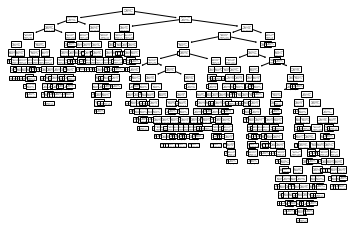

In [ ]:
tree.plot_tree(dTree);

In [ ]:
DT_list = []
ac_list_test = []
ac_list_train = []


for i in range(1, 101):
  DTree = DecisionTreeClassifier(max_depth = i)
  DTree = DTree.fit(x_train2, y_train2)
  Yhat_Train_pred = DTree.predict(x_train2)
  ac = accuracy_score(y_train2, Yhat_Train_pred)
  Yhat_Test_pred = DTree.predict(x_test2)
  ac_test = accuracy_score(y_test2, Yhat_Test_pred)
  DT_list.append(DTree)
  ac_list_test.append(ac_test)
  ac_list_train.append(ac)


In [ ]:
import matplotlib.pyplot as plt

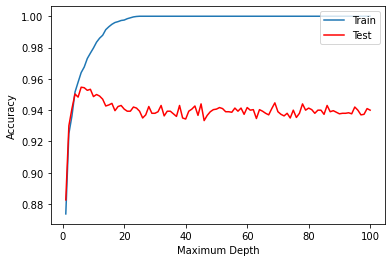

In [ ]:
max_depth = list(range(1,101))
plt.plot(max_depth,ac_list_train,label="Train")
plt.plot(max_depth,ac_list_test,label="Test",color='r')
axis = plt.legend(loc='upper right')
plt.ylabel('Accuracy') 
plt.xlabel('Maximum Depth') 
plt.show()

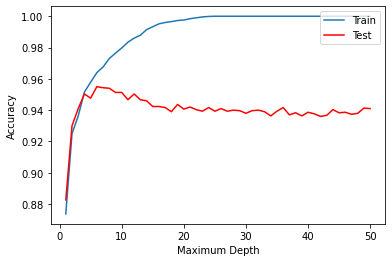

In [ ]:
max_depth = list(range(1,51))
plt.plot(max_depth,ac_list_train,label="Train")
plt.plot(max_depth,ac_list_test,label="Test",color='r')
axis = plt.legend(loc='upper right')
plt.ylabel('Accuracy') 
plt.xlabel('Maximum Depth') 
plt.show()

Here we have analyze the model for different depth to see for which depth the model is getting Overfit or Underfit and at which max_depth the model performs the best

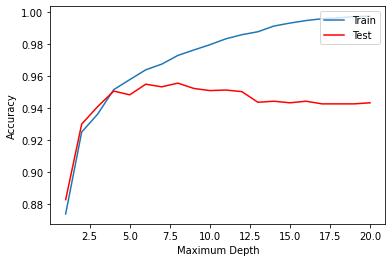

In [ ]:
max_depth = list(range(1,21))
plt.plot(max_depth,ac_list_train,label="Train")
plt.plot(max_depth,ac_list_test,label="Test",color='r')
axis = plt.legend(loc='upper right')
plt.ylabel('Accuracy') 
plt.xlabel('Maximum Depth') 
plt.show()